In [37]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
df = pd.read_csv("AirQualityUCI.csv", delimiter=';', decimal=',', na_values=[-200, "-200,0"])

In [78]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8990 entries, 0 to 9356
Data columns (total 15 columns):
Date             8990 non-null object
Time             8990 non-null object
CO(GT)           7343 non-null float64
PT08.S1(CO)      8990 non-null float64
NMHC(GT)         887 non-null float64
C6H6(GT)         8990 non-null float64
PT08.S2(NMHC)    8990 non-null float64
NOx(GT)          7395 non-null float64
PT08.S3(NOx)     8990 non-null float64
NO2(GT)          7392 non-null float64
PT08.S4(NO2)     8990 non-null float64
PT08.S5(O3)      8990 non-null float64
T                8990 non-null float64
RH               8990 non-null float64
AH               8990 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [79]:
df = df.iloc[:, :-2]

In [80]:
df["C6H6(GT)"].describe()

count    8991.000000
mean       10.083105
std         7.449820
min         0.100000
25%         4.400000
50%         8.200000
75%        14.000000
max        63.700000
Name: C6H6(GT), dtype: float64

In [85]:
total = df.isnull().sum().sort_values(ascending=False)
total

NMHC(GT)         8104
CO(GT)           1647
NO2(GT)          1598
NOx(GT)          1595
AH                  0
RH                  0
T                   0
PT08.S5(O3)         0
PT08.S4(NO2)        0
PT08.S3(NOx)        0
PT08.S2(NMHC)       0
C6H6(GT)            0
PT08.S1(CO)         0
Time                0
Date                0
dtype: int64

In [84]:
df = df.drop(df.loc[df['C6H6(GT)'].isnull()].index)


In [ ]:
sns.distplot(df['C6H6(GT)']);


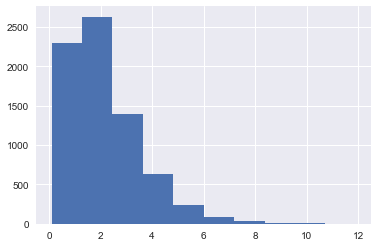

In [139]:
df['CO(GT)'].hist()


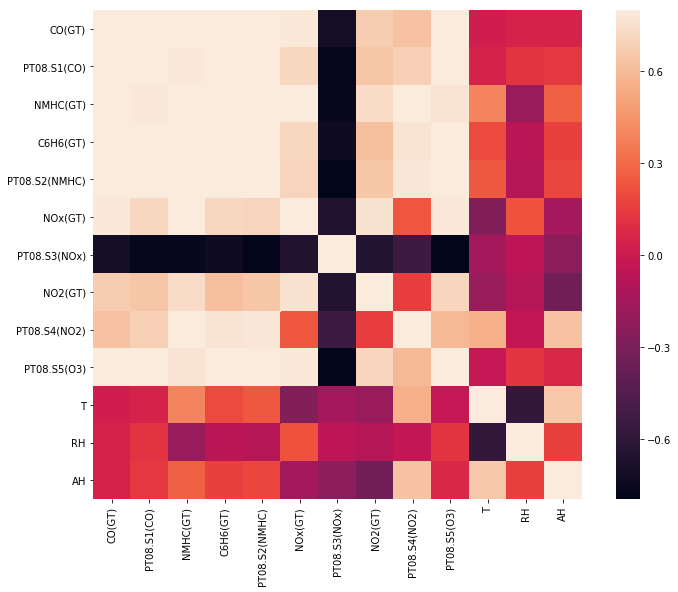

In [87]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

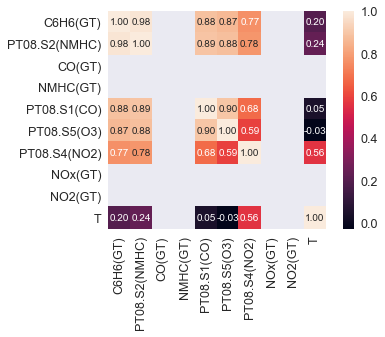

In [89]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'C6H6(GT)')['C6H6(GT)'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

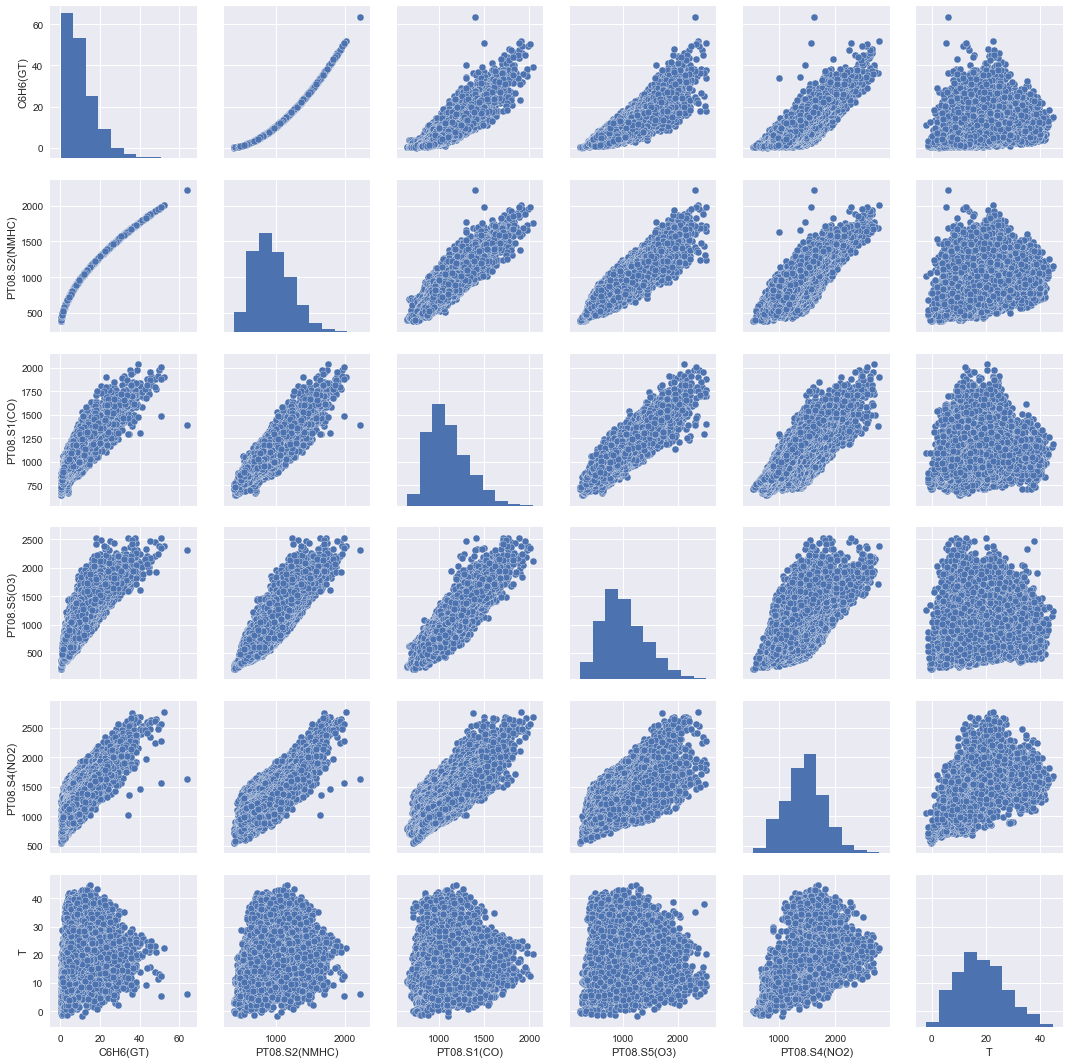

In [98]:
#scatterplot
sns.set()
cols = ['C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'PT08.S4(NO2)', 'T']
sns.pairplot(df[cols], size = 2.5)
plt.show();

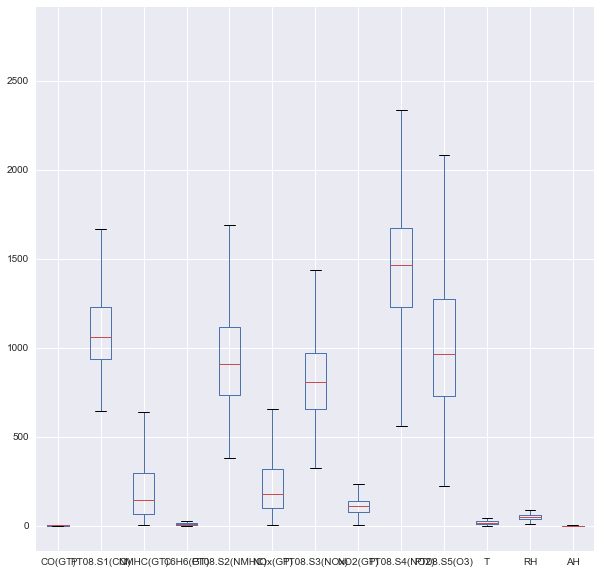

In [111]:
df.boxplot(figsize=[10,10])

In [101]:
from sklearn.preprocessing import StandardScaler

#standardizing data
target_scaled = StandardScaler().fit_transform(df['C6H6(GT)'][:,np.newaxis]);
low_range = target_scaled[target_scaled[:,0].argsort()][:10]
high_range= target_scaled[target_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.3401211 ]
 [-1.3401211 ]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]
 [-1.32669721]]

outer range (high) of the distribution:
[[5.02280285]
 [5.04965063]
 [5.11677009]
 [5.27785677]
 [5.29128066]
 [5.43894345]
 [5.45236734]
 [5.46579123]
 [5.6403018 ]
 [7.19747307]]


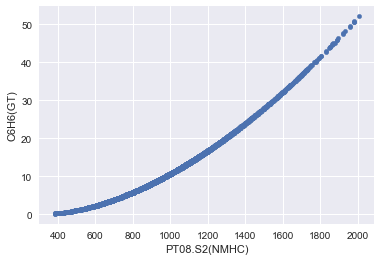

In [110]:
#bivariate analysis saleprice/grlivarea
var = 'PT08.S2(NMHC)'
data = pd.concat([df['C6H6(GT)'], df[var]], axis=1)
data.plot.scatter(x=var, y='C6H6(GT)');

In [109]:
#deleting points
# df.sort_values(by = 'PT08.S2(NMHC)', ascending = False)[:1]
df = df.drop(6160)


10/03/2004	18.00.00

In [122]:
df["day"] = df["Date"].apply(lambda x: x[:2])
df["month"] = df["Date"].apply(lambda x: x[3:5])
df["year"] = df["Date"].apply(lambda x: x[6:11])
df["hour"] = df["Time"].apply(lambda x: x[:2])
df[['day','month','year','hour']] = df[['day','month','year','hour']].apply(pd.to_numeric)


In [123]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,day,month,hour
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,10,3,18
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,10,3,19
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,10,3,20
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,10,3,21
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,10,3,22
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,2004,10,3,23
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,2004,11,3,0
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,2004,11,3,1
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,2004,11,3,2
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,2004,11,3,3


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8990 entries, 0 to 9356
Data columns (total 19 columns):
Date             8990 non-null object
Time             8990 non-null object
CO(GT)           7343 non-null float64
PT08.S1(CO)      8990 non-null float64
NMHC(GT)         887 non-null float64
C6H6(GT)         8990 non-null float64
PT08.S2(NMHC)    8990 non-null float64
NOx(GT)          7395 non-null float64
PT08.S3(NOx)     8990 non-null float64
NO2(GT)          7392 non-null float64
PT08.S4(NO2)     8990 non-null float64
PT08.S5(O3)      8990 non-null float64
T                8990 non-null float64
RH               8990 non-null float64
AH               8990 non-null float64
year             8990 non-null int64
day              8990 non-null int64
month            8990 non-null int64
hour             8990 non-null int64
dtypes: float64(13), int64(4), object(2)
memory usage: 1.4+ MB


In [148]:
y = df["C6H6(GT)"]
X = df.drop(columns=["C6H6(GT)", "Date", "Time"])

In [149]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [153]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model, X, y, cv=5, verbose=True)



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [151]:
na = df.isna().sum().sort_values(ascending=False)
na

hour             0
PT08.S3(NOx)     0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
NO2(GT)          0
month            0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
year             0
day              0
Date             0
dtype: int64

In [136]:
df.fillna({'NMHC(GT)': 0}, inplace=True)

In [147]:
df = df.drop(df.loc[df['CO(GT)'].isnull() | df['NO2(GT)'].isnull() | df['NOx(GT)'].isnull()].index)


In [146]:
df[df['CO(GT)'].isnull() | df['NO2(GT)'].isnull() | df['NOx(GT)'].isnull()]


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,day,month,hour
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,2004,11,3,3
10,11/03/2004,04.00.00,NaN,1011.0,14.0,1.3,527.0,21.0,1818.0,34.0,1197.0,445.0,10.1,60.5,0.7465,2004,11,3,4
33,12/03/2004,03.00.00,0.8,889.0,21.0,1.9,574.0,NaN,1680.0,NaN,1187.0,512.0,7.0,62.3,0.6261,2004,12,3,3
34,12/03/2004,04.00.00,NaN,831.0,10.0,1.1,506.0,21.0,1893.0,32.0,1134.0,384.0,6.1,65.9,0.6248,2004,12,3,4
39,12/03/2004,09.00.00,NaN,1545.0,0.0,22.1,1353.0,NaN,767.0,NaN,2058.0,1588.0,9.2,56.2,0.6561,2004,12,3,9
57,13/03/2004,03.00.00,1.7,1172.0,46.0,5.4,783.0,NaN,1179.0,NaN,1380.0,996.0,7.8,67.5,0.7173,2004,13,3,3
58,13/03/2004,04.00.00,NaN,1147.0,56.0,6.2,821.0,109.0,1132.0,83.0,1412.0,992.0,7.0,71.1,0.7158,2004,13,3,4
81,14/03/2004,03.00.00,2.4,1344.0,132.0,9.7,968.0,NaN,921.0,NaN,1620.0,1278.0,11.6,63.4,0.8674,2004,14,3,3
82,14/03/2004,04.00.00,NaN,1130.0,56.0,5.2,773.0,70.0,1130.0,82.0,1452.0,1051.0,12.1,61.1,0.8603,2004,14,3,4
105,15/03/2004,03.00.00,1.1,1078.0,44.0,4.4,734.0,NaN,1128.0,NaN,1487.0,1021.0,12.6,63.5,0.9230,2004,15,3,3


In [152]:
scores

array([0.98781688, 0.98369169, 0.98431286, 0.96119248, 0.97290593])

In [159]:
model.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
coefs = model.coef_
coefs

array([ 0.94061341, -0.03196859,  0.03161776,  5.95947587,  0.47022699,
        1.13522431, -0.56691279,  2.38405273, -0.05193384, -0.67265772,
       -0.60756048, -0.28799294,  1.86129849,  0.13933111,  1.18229081,
       -0.12952719])

In [167]:
list(zip(coefs, X.columns))

[(0.9406134135756885, 'CO(GT)'),
 (-0.0319685862411192, 'PT08.S1(CO)'),
 (0.03161776251503268, 'NMHC(GT)'),
 (5.959475870554131, 'PT08.S2(NMHC)'),
 (0.4702269927185254, 'NOx(GT)'),
 (1.1352243122633727, 'PT08.S3(NOx)'),
 (-0.5669127906330482, 'NO2(GT)'),
 (2.38405273488534, 'PT08.S4(NO2)'),
 (-0.05193383793515616, 'PT08.S5(O3)'),
 (-0.6726577235828521, 'T'),
 (-0.6075604839015418, 'RH'),
 (-0.28799293809682935, 'AH'),
 (1.861298493914659, 'year'),
 (0.13933111016805733, 'day'),
 (1.1822908116724546, 'month'),
 (-0.12952718758345383, 'hour')]

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'year', 'day', 'month', 'hour'],
      dtype='object')